# Import required libraries

In [55]:
## Statistical and visualization libraries
import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

## Mapping libraries
import folium
from folium.plugins import HeatMap

## Machine learning libraries
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder as le
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score,mean_absolute_error, accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

# Display graphs in the notebook
%matplotlib inline

# Load and describe the data

In [5]:
fires_dataframe = pd.read_csv('data/fires2.csv', parse_dates=[6])
parcels_dataframe = pd.read_excel('data/parcels2.xlsx', parse_dates=True)
foreclosures_dataframe = pd.read_excel('data/foreclosures.xlsx', parse_dates=True)
rent_reg_dataframe = pd.read_excel('data/rental_registration_permits.xlsx', parse_dates=True)
utility_disconnects_dataframe = pd.read_excel('data/utility_disconnects.xlsx', parse_dates=True)
code_cases_dataframe = pd.read_excel('data/code_cases.xlsx', parse_dates = True)
minnehaha_tax_dataframe = pd.read_excel('data/minnehaha_tax.xlsx', parse_dates = True)
lincoln_tax_dataframe = pd.read_excel('data/lincoln_tax.xlsx', parse_dates = True)
building_fires_dataframe = fires_dataframe[fires_dataframe['id2']== 111].copy()
crime_dataframe = pd.read_excel('data/crime.xlsx', parse_dates = True)

In [6]:
# Create copys of DataFrames so if I mess something up I don't have to load up everything again
fires = fires_dataframe.copy()
parcels = parcels_dataframe.copy()
foreclosures = foreclosures_dataframe.copy()
rent_reg = rent_reg_dataframe.copy()
utility_disconnects = utility_disconnects_dataframe.copy()
code_cases = code_cases_dataframe.copy()
minnehaha_tax = minnehaha_tax_dataframe.copy()
lincoln_tax = lincoln_tax_dataframe.copy()
building_fires = building_fires_dataframe.copy()
crime = crime_dataframe.copy()

In [5]:
parcels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59865 entries, 0 to 59864
Data columns (total 8 columns):
ADDRESS      59855 non-null object
SQFT         59865 non-null float64
ACREAGE      59865 non-null float64
FRONTFOOT    59865 non-null float64
PARHOUSE     59852 non-null float64
LANDUSE      59865 non-null int64
NUMUNITS     59865 non-null int64
ZIPCODE      59865 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.7+ MB


In [5]:
parcels.describe()

,TAG,OWNZIP,OWNZIP2,SQFT,ACREAGE,FRONTFOOT,ADDITIONNU,PARHOUSE,ACTIVITY,LANDUSE,NUMUNITS,ZIPCODE,Shape_Leng,Shape_Area
count,5.985400e+04,59560.000000,48204.000000,5.986500e+04,59865.000000,59865.000000,59845.000000,59852.000000,59865.000000,59865.000000,59865.000000,59865.000000,59865.000000,5.986500e+04
mean,1.420336e+13,56785.236014,1569.961165,3.022719e+04,0.694451,83.404921,93781.018464,3130.283265,20.334219,196.298622,1.323845,57105.756753,537.125953,3.019778e+04
std,4.175051e+12,6070.003906,2263.229039,2.877843e+05,6.606637,108.768123,2578.014239,2333.058543,22.619705,232.103763,6.419357,2.356349,730.864190,2.860198e+05
min,1.121850e+13,0.000000,0.000000,0.000000e+00,0.000000,0.000000,90005.000000,0.000000,1.000000,110.000000,0.000000,57103.000000,39.138863,4.624088e-01
25%,1.220423e+13,57104.000000,0.000000,6.653000e+03,0.150000,50.000000,91640.000000,1108.000000,11.000000,110.000000,1.000000,57104.000000,360.565229,6.702583e+03
50%,1.222228e+13,57106.000000,0.000000,8.880000e+03,0.200000,70.000000,93530.000000,2616.000000,11.000000,110.000000,1.000000,57106.000000,398.064593,8.921874e+03
75%,1.223523e+13,57108.000000,3106.000000,1.244500e+04,0.290000,90.000000,95185.000000,4825.000000,12.000000,130.000000,1.000000,57108.000000,467.960008,1.249985e+04
max,2.291820e+13,99690.000000,9625.000000,5.205275e+07,1194.970000,6127.000000,98288.000000,47184.000000,97.000000,999.000000,364.000000,57197.000000,42956.145459,5.205322e+07


In [6]:
fires.type.value_counts()

Building fire                                               1258
Passenger vehicle fire                                       639
Cooking fire, confined to container                          244
Grass fire                                                   198
Dumpster or other outside trash receptacle fire              183
Outside rubbish, trash or waste fire                         124
Brush, or brush and grass mixture fire                        94
Special outside fire, other                                   91
Outside equipment fire                                        80
Mobile property (vehicle) fire, other                         71
Fire, other                                                   71
Natural vegetation fire, other                                70
Trash or rubbish fire, contained                              64
Outside rubbish fire, other                                   57
Fire in mobile home used as fixed residence                   56
Road freight or transport

In [7]:
building_fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 652 to 2318
Data columns (total 10 columns):
FID           1258 non-null int64
Join_Count    1258 non-null int64
TARGET_FID    1258 non-null int64
id            1258 non-null int64
id2           1258 non-null int64
type          1258 non-null object
date          1258 non-null datetime64[ns]
lat           1258 non-null float64
lon           1258 non-null float64
ADDRESS       1258 non-null object
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 108.1+ KB


In [8]:
fire_map = folium.Map(location=[43.54, -96.72], zoom_start=14, tiles='Stamen Terrain')
heat_df = building_fires[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]
HeatMap(heat_data).add_to(fire_map)
fire_map

# Data wrangling

In [7]:
def cleanActivity(x):
    if x == 11 or x == 12 or x == 13:
        x = 'SINGLE OR TWO RESIDENTIAL'
    elif x == 21 or x == 22 or x == 23 or x == 24 or x == 25:
        x = 'MULTIFAMILY'
    elif x in list(range(31,39)):
        x = 'OFFICE AND PUBLIC SERVICE'
    elif x in list(range(40,50)):
        x = 'INSTITUTIONAL'
    elif x in list(range(51, 54)):
        x = 'COMMERCIAL'
    elif x == 61 or x in list(range(63,70)):
        x = 'INDUSTRIAL'
    elif x == 62:
        x = 'AIRPORT'
    elif x in range(70,98) or x in range(0, 9):
        x = 'OPEN SPACES/NA'
    return x


parcels['ACTIVITY'] = parcels.ACTIVITY.apply(cleanActivity)

# Parcels dataset
df = pd.concat([parcels, pd.get_dummies(parcels.ACTIVITY, prefix='ACT_'), pd.get_dummies(parcels.PARPR), pd.get_dummies(parcels.PARCELTYPE), pd.get_dummies(parcels.PARTYPE), pd.get_dummies(parcels.COUNTY)], axis = 1)
df.PARHOUSE.fillna(method='bfill', inplace = True)
df = df[df.ACTIVITY != 'AIRPORT']
df = df[df.ACTIVITY != 'OPEN SPACES/NA']
parcels.drop(columns = ['BlockDesig', 'FORM_PRIMA', 'PARCELTYPE', 'FORM_COMME', 'PARCEL_TRA', 'PARCEL_LOT', 'created_us', 'TAG', 'ADDITION', 'ADDITIONPR', 'COUNTYID', 'OWNNAME1', 'OWNZIP', 'OWNZIP2', 'OWNNAME2', 'OWNCITY', 'OWNSTATE', 'OWNADDRESS', 'LEGAL', 'ADDITIONNU', 'PARHALF', 'PARPD', 'UNITNUM', 'GlobalID', 'last_edite', 'Shape_Leng', 'Shape_Area', 'DEPARTMENT', 'FORM_ACCES', 'FORM_SIGNE', 'FORM_DATE', 'created_da', 'last_edi_1', 'PARPR', 'PARTYPE', 'COUNTY', 'PARSTREET', 'LegalStart', 'ACTIVITY'], inplace = True)
df.drop(columns = ['BlockDesig', 'ACREAGE', 'FORM_PRIMA', 'PARCELTYPE', 'FORM_COMME', 'PARCEL_TRA', 'PARCEL_LOT', 'created_us', 'TAG', 'ADDITION', 'ADDITIONPR', 'COUNTYID', 'OWNNAME1', 'OWNZIP', 'OWNZIP2', 'OWNNAME2', 'OWNCITY', 'OWNSTATE', 'OWNADDRESS', 'LEGAL', 'ADDITIONNU', 'PARHALF', 'PARPD', 'UNITNUM', 'GlobalID', 'last_edite', 'Shape_Leng', 'Shape_Area', 'DEPARTMENT', 'FORM_ACCES', 'FORM_SIGNE', 'FORM_DATE', 'created_da', 'last_edi_1', 'PARPR', 'PARTYPE', 'COUNTY', 'PARSTREET', 'LegalStart', 'ACTIVITY'], inplace = True)

# Fire dataset
building_fires = building_fires.groupby('ADDRESS').max()
building_fires.drop(columns = ['FID', 'Join_Count', 'TARGET_FID', 'id', 'type', 'lat', 'lon', 'id2'], inplace = True)
building_fires['INCIDENT'] = 1
building_fires.info()
df = pd.merge(df, building_fires, how = 'left', on='ADDRESS')
df.INCIDENT.fillna(0, inplace = True)
df.date.fillna(pd.to_datetime('1/1/2008'), inplace = True)

# Foreclosure dataset
foreclosure_df = pd.DataFrame(foreclosures.groupby('ADDRESS').count())
foreclosure_df.rename(columns = { 'NAME' : 'FORECLOSED'}, inplace = True)
foreclosure_df.drop(columns = ['AUCTIONDATE', 'ASSESSEDVALUE', 'YEAR'], inplace = True)
df = pd.merge(df, foreclosure_df, how = 'left', on = 'ADDRESS')
df.FORECLOSED.fillna(0, inplace = True)

# Rent registry dataset
rent_reg.drop(columns = ['City_1', 'State_1', 'Permit_Num', 'Contact_Ty', 'Last_Name', 'First_Name', 'Middle_Ini', 'Business_N', 'Contact_Pr', 'Business_P', 'Mobile_Pho', 'Home_Phone', 'Email', 'Contact_Ad', 'Issue_Date'], inplace = True)
rent_reg.Units.fillna(value=rent_reg.Units.median(), inplace = True)
rent_reg_grouped = rent_reg.groupby('Address').mean()
rent_df = pd.DataFrame(rent_reg_grouped)
rent_df.rename(columns = { 'Address' : 'ADDRESS', 'Units' : 'RENT_REG_UNITS', 'YEAR' : 'RENT_REG_YEAR'}, inplace = True)
rent_df.rename_axis('ADDRESS', inplace = True)
rent_df['RENT_REG'] = 1
df = pd.merge(df, rent_df, how = 'left', on = 'ADDRESS')
df.RENT_REG.fillna(0, inplace = True)
df.RENT_REG_UNITS.fillna(0, inplace = True)
df.RENT_REG_YEAR.fillna(0, inplace = True)

# Utility disconnects dataset
utility_disconnects.rename(columns = {'Address' : 'ADDRESS', 'Year' : 'UTILITY_DISCONNECTS'}, inplace = True)
uti_disc_grouped = utility_disconnects.groupby('ADDRESS').count()
uti_disc_df = pd.DataFrame(uti_disc_grouped)
uti_disc_df['ANY_DISCONNECT'] = 1
df = pd.merge(df, uti_disc_df, how = 'left', on = 'ADDRESS')
df.UTILITY_DISCONNECTS.fillna(0, inplace = True)
df.ANY_DISCONNECT.fillna(0, inplace = True)

# Code cases
case_types = pd.get_dummies(code_cases.CaseType)
code_cases = pd.concat([code_cases, case_types], axis=1)
code_cases.drop(columns = ['Year'], inplace = True)
code_cases_grouped = code_cases.groupby(['ADDRESS']).sum()
code_cases_df = pd.DataFrame(code_cases_grouped)
code_cases_df['TOTAL_VIOLATIONS'] = code_cases_df.sum(axis=1)
code_cases_df['ANY_VIOLATIONS'] = 1
df = pd.merge(df, code_cases_df, how = 'left', on = 'ADDRESS')
df.ANY_VIOLATIONS.fillna(0, inplace = True)
df['Building Service'].fillna(0, inplace = True)
df['Drainage'].fillna(0, inplace = True)
df['Erosion and Sediment Control'].fillna(0, inplace = True)
df['Fire'].fillna(0, inplace = True)
df['Health Nuisance Complaints'].fillna(0, inplace = True)
df['IMPORT / Tree Survey & Stump Removal'].fillna(0, inplace = True)
df['Illicit Discharge'].fillna(0, inplace = True)
df['Landfill'].fillna(0, inplace = True)
df['Manufactured Housing'].fillna(0, inplace = True)
df['Parks and Rec - Dead or Diseased Tree'].fillna(0, inplace = True)
df['Parks and Rec - Tree Complaint'].fillna(0, inplace = True)
df['Property Maintenance'].fillna(0, inplace = True)
df['Rental Registration'].fillna(0, inplace = True)
df['Right of Way '].fillna(0, inplace = True)
df['Sidewalks and Ramps'].fillna(0, inplace = True)
df['Snow'].fillna(0, inplace = True)
df['Special Assessment'].fillna(0, inplace = True)
df['Vegetation'].fillna(0, inplace = True)
df['Waste Water'].fillna(0, inplace = True)
df['Water Purfication'].fillna(0, inplace = True)
df['Zoning'].fillna(0, inplace = True)
df.TOTAL_VIOLATIONS.fillna(0, inplace = True)

# Crime
crime.rename(columns = {'Offense' : 'CRIME_INCIDENT'}, inplace = True)
crime_grouped = crime.groupby('ADDRESS').count()
crime_df = pd.DataFrame(crime_grouped[['CRIME_INCIDENT']])
crime_df['ANY_CRIME'] = 1
df = pd.merge(df, crime_df, how = 'left', on = 'ADDRESS')
df.CRIME_INCIDENT.fillna(0, inplace = True)
df.ANY_CRIME.fillna(0, inplace = True)

# Tax assessment
minnehaha_tax.drop(columns=['TAG', 'COUNTYID', 'ACREAGE', 'SQFT', 'FRONTFOOT', 'PARHOUSE',
       'PARHALF', 'PARPR', 'PARSTREET', 'PARTYPE', 'PARPD', 'LOT',
       'BLOCK', 'TRACT', 'SUBDIVNO', 'ADDITION', 'LEGAL', 'COUNTY', 'MRTNSP',
       'MRSCHD', 'SCHOOLDESC', 'MRZON1', 'NUMUNITS', 'MRLYAP', 'MAP_ID'], inplace = True)
lincoln_tax['ADDRESS'] = lincoln_tax.Address
lincoln_tax.drop(columns = ['FID', 'OBJECTID', 'PID', 'Plat', 'SchoolDist', 'Township', 'STR',
       'Address', 'Name', 'Add1', 'Add2', 'Add3', 'Zip', 'Legal1', 'Legal2',
       'Legal3', 'Legal4', 'Class1_1', 'Class2_1','Class3_1', 'Class4_1', 'Class5_1'], inplace = True)
combined_tax = pd.merge(lincoln_tax, minnehaha_tax, how = 'outer', on = 'ADDRESS')
combined_tax.fillna(0, inplace = True)

combined_tax['LANDVALUE'] = combined_tax.MRLNVC + combined_tax.Value1_1
combined_tax['BUILDVALUE'] = combined_tax.MRBDVC + combined_tax.Value12_1
combined_tax['TOTALVALUE'] = combined_tax[['MRTOTC' , 'Value1_1', 'Value12_1', 'Value13_1', 'Value14_1', 'Value15_1']].sum(axis=1) 

combined_tax.drop(columns=['Value1_1', 'Value12_1', 'Value13_1','Value14_1', 'Value15_1', 'MRLNVC', 'MRBDVC', 'MRTOTC'], inplace = True)

df = pd.merge(df, combined_tax, how = 'left', on = 'ADDRESS')
df = df[df.ADDRESS != '0']
df = df.dropna(subset=['ADDRESS'])
df.LANDVALUE.fillna(0, inplace = True)
df.BUILDVALUE.fillna(0, inplace = True)
df.TOTALVALUE.fillna(0, inplace = True)
df.set_index('ADDRESS', inplace = True)

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries,   to 961 S BLAINE AVE
Data columns (total 2 columns):
date        1043 non-null datetime64[ns]
INCIDENT    1043 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.4+ KB


In [8]:
df1 = df.pop('INCIDENT')
df['INCIDENT'] = df1
df.head(10)

,SQFT,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,ACT__14,ACT__AIRPORT,ACT__COMMERCIAL,ACT__INDUSTRIAL,...,Water Purfication,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,CRIME_INCIDENT,ANY_CRIME,LANDVALUE,BUILDVALUE,TOTALVALUE,INCIDENT
ADDRESS,,,,,,,,,,,,,,,,,,,,,
3910 E WILCOX ST,154001.0,385.0,3910.0,540,0,57104,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,269502.0,1183885.0,1453387.0,0.0
6100 E RICE ST,93654.0,0.0,6100.0,460,0,57110,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,733.0,733.0,0.0
6630 E RICE ST,218000.0,0.0,6630.0,460,0,57110,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,0.0,50000.0,0.0
6600 E RICE ST,400000.0,0.0,6600.0,460,0,57110,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,91800.0,0.0,91800.0,0.0
4800 N VELOCITY AVE,106049.0,275.0,4800.0,250,0,57104,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,185586.0,885096.0,1070682.0,0.0
4810 N VELOCITY AVE,165828.0,386.0,4810.0,250,0,57104,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,290199.0,608199.0,898398.0,0.0
4200 E PRODUCER LN,250262.0,421.0,4200.0,250,0,57104,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4401 E PRODUCER LN,291478.0,409.0,4401.0,250,0,57104,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,510087.0,1932611.0,2442698.0,0.0
4001 W BENSON RD,85845.0,350.0,4001.0,680,0,57107,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,278996.0,1322602.0,1601598.0,0.0


In [10]:
df.INCIDENT.value_counts()

0.0    54127
1.0     1121
Name: INCIDENT, dtype: int64

In [9]:
## Hiding the 2018 data
# First create a new column for parcels with incidents in 2018
df['INCIDENT_2018'] = [1 if date > pd.to_datetime('2018') else 0 for date in df['date']] 
# Now turn all 2018 fire incidents off
df.loc[(df.date > '2018') & (df.INCIDENT == 1), 'INCIDENT'] = 0
df.head()

,SQFT,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,ACT__14,ACT__AIRPORT,ACT__COMMERCIAL,ACT__INDUSTRIAL,...,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,CRIME_INCIDENT,ANY_CRIME,LANDVALUE,BUILDVALUE,TOTALVALUE,INCIDENT,INCIDENT_2018
ADDRESS,,,,,,,,,,,,,,,,,,,,,
3910 E WILCOX ST,154001.0,385.0,3910.0,540,0,57104,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,269502.0,1183885.0,1453387.0,0.0,0
6100 E RICE ST,93654.0,0.0,6100.0,460,0,57110,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,733.0,733.0,0.0,0
6630 E RICE ST,218000.0,0.0,6630.0,460,0,57110,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,50000.0,0.0,50000.0,0.0,0
6600 E RICE ST,400000.0,0.0,6600.0,460,0,57110,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,91800.0,0.0,91800.0,0.0,0
4800 N VELOCITY AVE,106049.0,275.0,4800.0,250,0,57104,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,185586.0,885096.0,1070682.0,0.0,0


In [12]:
df.INCIDENT.value_counts()

0.0    54221
1.0     1027
Name: INCIDENT, dtype: int64

In [10]:
X = df.drop(columns = ['INCIDENT', 'date'])
y = df.INCIDENT

# Apply Machine Learning algorithms

In [80]:
#### Optimizing the algorithm for the best possible results
# https://campus.datacamp.com/courses/designing-machine-learning-workflows-in-python/model-lifecycle-management?ex=1
# Create pipeline with feature selector and classifier
pipe = Pipeline([
    ('feature_selection', SelectKBest(f_classif)),
    ('clf', RandomForestClassifier(random_state=2))])

# Create a parameter grid
params = {
   'feature_selection__k':[3, 5, 10, 20, 50],
    'clf__n_estimators':[2, 5, 10, 100],
    'clf__max_depth' : [3, 5, 10, 20, 50]}

# Initialize the grid search object
grid_search = GridSearchCV(pipe, param_grid=params)

# Fit it to the data and print the best value combination
print(grid_search.fit(X, y).best_params_)

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 271] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14  34  44  55  60  67  71  72  77  84  85  88  94  95  98 100 103
 104 106 110 111 113 115 116 118 122 124 125 130 131 132 133 135 138 142
 147 150 153 157 161 164 168 172 173 175 178 198 200 204 217 225 226 235
 247 248 254 257 259 260 261 262 265 266 267 269 

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  7   8  14  29  39  40  46  49  52  56  57  61  68  75  99 102 108 109
 118 120 121 137 142 145 148 170 176 180 182 188 193 195 207 210 214 220
 223 227 243 247 249 253 254 256 258 260 261 262 264 266 269 271 283 297] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  14 118 142 247 254 260 261 262 266 269 271] are constant.
  UserWarning)
C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb 

{'clf__max_depth': 10, 'clf__n_estimators': 100, 'feature_selection__k': 10}


In [14]:
# Feature selection
sk = SelectKBest(chi2, k=20)
which_selected = sk.fit(X, y).get_support()
X.columns[which_selected]

Index(['SQFT', 'FRONTFOOT', 'PARHOUSE', 'LANDUSE', 'NUMUNITS',
       'ACT__MULTIFAMILY', 'Condo or Suite', 'RENT_REG_UNITS', 'RENT_REG_YEAR',
       'RENT_REG', 'UTILITY_DISCONNECTS', 'Health Nuisance Complaints',
       'Property Maintenance', 'TOTAL_VIOLATIONS', 'ANY_VIOLATIONS',
       'CRIME_INCIDENT', 'ANY_CRIME', 'LANDVALUE', 'BUILDVALUE', 'TOTALVALUE'],
      dtype='object')

In [11]:
X.head()

,SQFT,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,ACT__14,ACT__AIRPORT,ACT__COMMERCIAL,ACT__INDUSTRIAL,...,Water Purfication,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,CRIME_INCIDENT,ANY_CRIME,LANDVALUE,BUILDVALUE,TOTALVALUE,INCIDENT_2018
ADDRESS,,,,,,,,,,,,,,,,,,,,,
3910 E WILCOX ST,154001.0,385.0,3910.0,540,0,57104,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,269502.0,1183885.0,1453387.0,0
6100 E RICE ST,93654.0,0.0,6100.0,460,0,57110,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,733.0,733.0,0
6630 E RICE ST,218000.0,0.0,6630.0,460,0,57110,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,0.0,50000.0,0
6600 E RICE ST,400000.0,0.0,6600.0,460,0,57110,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,91800.0,0.0,91800.0,0
4800 N VELOCITY AVE,106049.0,275.0,4800.0,250,0,57104,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,185586.0,885096.0,1070682.0,0


In [12]:
X = df[['SQFT', 'FRONTFOOT', 'NUMUNITS', 'Condo or Suite', 'Health Nuisance Complaints',
       'ACT__MULTIFAMILY', 'Property Maintenance', 'RENT_REG_UNITS', 'RENT_REG_YEAR',
       'LANDVALUE', 'BUILDVALUE', 'CRIME_INCIDENT', 'ANY_CRIME', 'UTILITY_DISCONNECTS', 'TOTAL_VIOLATIONS']]
y = df['INCIDENT']

In [13]:
# 36 high score value:
# n_estimators = 10, max_depth = 4
#X = df[['SQFT', 'FRONTFOOT', 'PARHOUSE', 'LANDUSE', 'NUMUNITS',
#       'RENT_REG_UNITS', 'RENT_REG_YEAR', 'LANDVALUE', 'BUILDVALUE',
#       'TOTALVALUE']]

random_forest = RandomForestClassifier(n_estimators=100, max_depth = 10)
random_forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Cross validation and 2018 predictions

In [14]:
# Cross-validation score for Random Forest
Score = cross_val_score(random_forest, X, y, cv=3)
round(np.mean(Score)*100, ndigits=4)

98.1502

Best RF score = 98.1664

In [15]:
#df['PREDICTION_dt'] = decision_tree.predict_proba(X)
probability = random_forest.predict_proba(X)[:,1]
probability.sum()
df['PREDICTION'] = probability

In [16]:
rf_proba_results = df[df['PREDICTION'] > 0]
rf_proba_results.head()

,SQFT,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,ACT__14,ACT__AIRPORT,ACT__COMMERCIAL,ACT__INDUSTRIAL,...,TOTAL_VIOLATIONS,ANY_VIOLATIONS,CRIME_INCIDENT,ANY_CRIME,LANDVALUE,BUILDVALUE,TOTALVALUE,INCIDENT,INCIDENT_2018,PREDICTION
ADDRESS,,,,,,,,,,,,,,,,,,,,,
3910 E WILCOX ST,154001.0,385.0,3910.0,540,0,57104,0,0,1,0,...,0.0,0.0,0.0,0.0,269502.0,1183885.0,1453387.0,0.0,0,0.035438
6100 E RICE ST,93654.0,0.0,6100.0,460,0,57110,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,733.0,733.0,0.0,0,0.007471
6630 E RICE ST,218000.0,0.0,6630.0,460,0,57110,0,0,0,1,...,0.0,0.0,0.0,0.0,50000.0,0.0,50000.0,0.0,0,0.008951
6600 E RICE ST,400000.0,0.0,6600.0,460,0,57110,0,0,0,1,...,0.0,0.0,0.0,0.0,91800.0,0.0,91800.0,0.0,0,0.010890
4800 N VELOCITY AVE,106049.0,275.0,4800.0,250,0,57104,0,0,0,1,...,0.0,0.0,0.0,0.0,185586.0,885096.0,1070682.0,0.0,0,0.016470


In [17]:
print('Total properties with some risk : ' + str(rf_proba_results.shape[0]))
print('Total correctly predicted fires : ' + str(rf_proba_results.INCIDENT.sum()))
print('Total 2018 predicted fires : ' + str(rf_proba_results.INCIDENT_2018.sum()))

Total properties with some risk : 55248
Total correctly predicted fires : 1027.0
Total 2018 predicted fires : 94


In [19]:
np.random.seed(0)
df['RANDOM'] = np.random.rand(df.shape[0])
df_random = df.nlargest(2000, columns = 'RANDOM')
df_random2 = df.nlargest(1000, columns = 'RANDOM')

rf_results_search = df.nlargest(2000, columns = 'PREDICTION')
print('Total overall correctly predicted fires : ' + str(rf_results_search.INCIDENT.sum()))
print('Total 2018 predicted fires (2000 searches): ' + str(rf_results_search.INCIDENT_2018.sum()))
print('Total random predicted fires (2000 searches): ' + str(df_random.INCIDENT_2018.sum()))

rf_results_search2 = df.nlargest(1000, columns = 'PREDICTION')
print('Total 2018 predicted fires (1000 searches: ' + str(rf_results_search2.INCIDENT_2018.sum()))
print('Total random predicted fires (1000 searches): ' + str(df_random2.INCIDENT_2018.sum()))


print('Best 1000s score so far : 27')
print('Best 2000s score so far : 44')

Total overall correctly predicted fires : 596.0
Total 2018 predicted fires (2000 searches): 44
Total random predicted fires (2000 searches): 6
Total 2018 predicted fires (1000 searches: 26
Total random predicted fires (1000 searches): 4
Best 1000s score so far : 27
Best 2000s score so far : 44


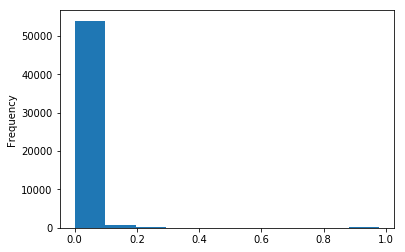

In [20]:
df.PREDICTION.plot.hist()

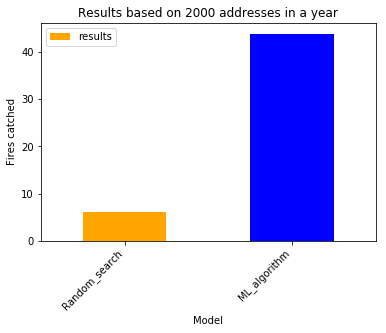

In [21]:


random_results = df_random.INCIDENT_2018.sum()

rf_results = rf_results_search.INCIDENT_2018.sum()

df_results = pd.DataFrame({'Model' : ['Random_search', 'ML_algorithm'], 'results' : [random_results, rf_results]})
ax = df_results.plot.bar(x = 'Model', y = 'results', color = ['orange', 'b'])

plt.title('Results based on 2000 addresses in a year')
plt.ylabel('Fires catched')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


plt.savefig('Results - Model comparison.pdf', bbox_inches = 'tight', pad_inches = 0.5)

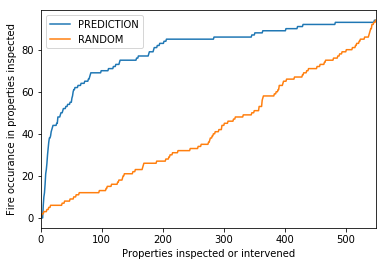

In [22]:
model_comparison = []

for searches in range(0, 55000, 100):
    prediction = df.nlargest(searches, columns = 'PREDICTION').INCIDENT_2018.sum()
    random = df.nlargest(searches, columns = 'RANDOM').INCIDENT_2018.sum()
    model_comparison.append([prediction, random])
    
model_comparison_df = pd.DataFrame(model_comparison, columns=['PREDICTION', 'RANDOM'])

model_comparison_df.plot()
plt.xlabel('Properties inspected or intervened')
plt.ylabel('Fire occurance in properties inspected')

plt.savefig('Model comparison - properties intervened.pdf', bbox_inches = 'tight', pad_inches = 2.5)
    

    

In [23]:
df.nlargest(55000, columns = 'PREDICTION').INCIDENT.sum()

1027.0

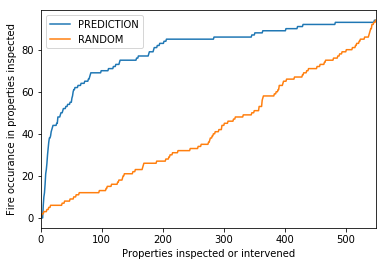

In [24]:
model_comparison2 = []

for searches in range(0, 55000, 100):
    prediction = df.nlargest(searches, columns = 'PREDICTION').INCIDENT.sum()
    random = df.nlargest(searches, columns = 'RANDOM').INCIDENT.sum()
    model_comparison2.append([prediction, random])
    
model_comparison_df2 = pd.DataFrame(model_comparison, columns=['PREDICTION', 'RANDOM'])

model_comparison_df2.plot()
plt.xlabel('Properties inspected or intervened')
plt.ylabel('Fire occurance in properties inspected')

plt.savefig('Model comparison - all.pdf', bbox_inches = 'tight', pad_inches = 2.5)
    


In [26]:
df_commercial = df[df['ACT__COMMERCIAL'] == 1]

0.8499638150509328


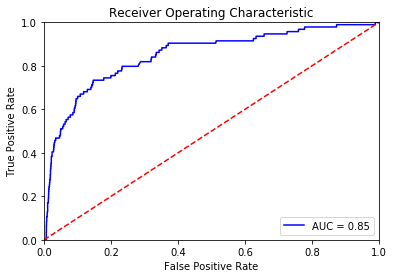

In [60]:
y_test = df.INCIDENT_2018
preds = df.PREDICTION

print(roc_auc_score(y_test, preds))

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
df_commercial.INCIDENT.sum()

92.0

In [28]:
df_commercial.INCIDENT_2018.sum()

11

In [29]:
df_commercial.PREDICTION.sum()

df_random_commercial = df_commercial.nlargest(500, columns = 'RANDOM')
df_random_commercial_2 = df_commercial.nlargest(100, columns = 'RANDOM')
df_random_commercial_3 = df_commercial.nlargest(1000, columns = 'RANDOM')
df_random_commercial_4 = df_commercial.nlargest(1200, columns = 'RANDOM')


rf_results_search_commercial = df_commercial.nlargest(500, columns = 'PREDICTION')
print('Total overall correctly predicted fires : ' + str(rf_results_search_commercial.INCIDENT.sum()))
print('Total 2018 predicted fires (500 searches): ' + str(rf_results_search_commercial.INCIDENT_2018.sum()))
print('Total random predicted fires (500 searches): ' + str(df_random_commercial.INCIDENT_2018.sum()))

rf_results_search_commercial_2 = df_commercial.nlargest(100, columns = 'PREDICTION')
print('Total 2018 predicted fires (100 searches): ' + str(rf_results_search_commercial_2.INCIDENT_2018.sum()))
print('Total random predicted fires (100 searches): ' + str(df_random_commercial_2.INCIDENT_2018.sum()))


rf_results_search_commercial_3 = df_commercial.nlargest(1000, columns = 'PREDICTION')
print('Total 2018 predicted fires (1000 searches: ' + str(rf_results_search_commercial_3.INCIDENT_2018.sum()))
print('Total random predicted fires (1000 searches): ' + str(df_random_commercial_3.INCIDENT_2018.sum()))

Total overall correctly predicted fires : 79.0
Total 2018 predicted fires (500 searches): 8
Total random predicted fires (500 searches): 3
Total 2018 predicted fires (100 searches): 2
Total random predicted fires (100 searches): 1
Total 2018 predicted fires (1000 searches: 11
Total random predicted fires (1000 searches): 8


In [30]:
tup = []

for searches in range(0, 1500):
    prediction = df_commercial.nlargest(searches, columns = 'PREDICTION').INCIDENT_2018.sum()
    random = df_commercial.nlargest(searches, columns = 'RANDOM').INCIDENT_2018.sum()
    tup.append([prediction, random])

In [31]:
tup_df = pd.DataFrame(tup, columns=['PREDICTION', 'RANDOM'])
tup_df.head()

,PREDICTION,RANDOM
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


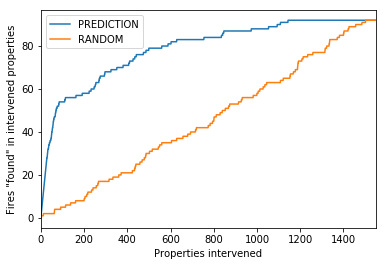

In [49]:
tup2 = []

for searches in range(0, 1550):
    prediction = df_commercial.nlargest(searches, columns = 'PREDICTION').INCIDENT.sum()
    random = df_commercial.nlargest(searches, columns = 'RANDOM').INCIDENT.sum()
    tup2.append([prediction, random])
    
tup_df2 = pd.DataFrame(tup2, columns=['PREDICTION', 'RANDOM'])
tup_df2.head()


tup_df2.plot()
plt.ylabel('Fires "found" in intervened properties')
plt.xlabel('Properties intervened')

plt.savefig('Commercial properties - all.pdf', bbox_inches = 'tight', pad_inches = 2.5)

In [53]:
df_commercial[df_commercial.PREDICTION > 0.1]

,SQFT,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,ACT__14,ACT__AIRPORT,ACT__COMMERCIAL,ACT__INDUSTRIAL,...,ANY_VIOLATIONS,CRIME_INCIDENT,ANY_CRIME,LANDVALUE,BUILDVALUE,TOTALVALUE,INCIDENT,INCIDENT_2018,PREDICTION,RANDOM
ADDRESS,,,,,,,,,,,,,,,,,,,,,
4900 N CLIFF AVE,93380.0,326.0,4900.0,850,0,57104,0,0,1,0,...,1.0,16.0,1.0,256795.0,816132.0,1072927.0,1.0,0,0.204625,0.697631
5100 N CLIFF AVE,76555.0,153.0,5100.0,850,0,57104,0,0,1,0,...,0.0,32.0,1.0,210526.0,1546161.0,1756687.0,0.0,0,0.111067,0.837945
4515 N CLIFF AVE,217291.0,372.0,4515.0,570,0,57104,0,0,1,0,...,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0,0.121430,0.282807
5001 N CLIFF AVE,146405.0,400.0,5001.0,850,0,57104,0,0,1,0,...,0.0,12.0,1.0,472500.0,1361707.0,1834207.0,1.0,0,0.142855,0.934214
5013 N CLIFF AVE,56400.0,141.0,5013.0,847,0,57104,0,0,1,0,...,0.0,37.0,1.0,0.0,911720.0,911720.0,0.0,0,0.124956,0.179604
5410 N GRANITE LN,101030.0,307.0,5410.0,850,0,57107,0,0,1,0,...,0.0,11.0,1.0,303047.0,3708025.0,4011072.0,1.0,0,0.178058,0.131483
4705 N NORTHVIEW AVE,589165.0,533.0,4705.0,563,0,57107,0,0,1,0,...,0.0,14.0,1.0,1620205.0,479606.0,2099811.0,0.0,0,0.132342,0.221396
4301 N CLIFF AVE,261056.0,403.0,4301.0,540,0,57104,0,0,1,0,...,1.0,3.0,1.0,610218.0,587468.0,1197686.0,0.0,0,0.103320,0.444587
5001 N GRANITE LN,818492.0,693.0,5001.0,630,0,57107,0,0,1,0,...,0.0,171.0,1.0,1432361.0,2934544.0,4366905.0,0.0,0,0.166235,0.244889


In [34]:
commercial_predict = df_commercial.sort_values('PREDICTION', ascending = False)

In [35]:
commercial_predict.loc[:500, 'COLOR_CODING'] = 'red'
commercial_predict.loc[500:1200, 'COLOR_CODING'] = 'yellow'
commercial_predict.loc[1200:, 'COLOR_CODING'] = 'green'

commercial_predict.to_csv('color_coded_commercial.csv')

In [42]:
red_perc = commercial_predict[commercial_predict['COLOR_CODING'] == 'red'].INCIDENT.sum() / commercial_predict.INCIDENT.sum()
yellow_perc = commercial_predict[commercial_predict['COLOR_CODING'] == 'yellow'].INCIDENT.sum() / commercial_predict.INCIDENT.sum()
green_perc = commercial_predict[commercial_predict['COLOR_CODING'] == 'green'].INCIDENT.sum() / commercial_predict.INCIDENT.sum()

print('Historically, red category has this amount of all fires: ' + str(red_perc))
print('Historically, yellow category has this amount of all fires: ' + str(yellow_perc))
print('Historically, green category has this amount of all fires: ' + str(green_perc))

Historically, red category has this amount of all fires: 0.8586956521739131
Historically, yellow category has this amount of all fires: 0.14130434782608695
Historically, green category has this amount of all fires: 0.0


In [45]:
commercial_predict[commercial_predict['COLOR_CODING'] == 'yellow'].shape

(700, 80)

# Describe and export the results

In [27]:
# Feature importance
# https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',                                                                 
                                                                        ascending=False)
feature_importances

,importance
SQFT,0.220301
CRIME_INCIDENT,0.213268
FRONTFOOT,0.102240
NUMUNITS,0.086317
LANDVALUE,0.075843
BUILDVALUE,0.071929
RENT_REG_UNITS,0.053472
RENT_REG_YEAR,0.029981
ANY_CRIME,0.029438
TOTAL_VIOLATIONS,0.023814


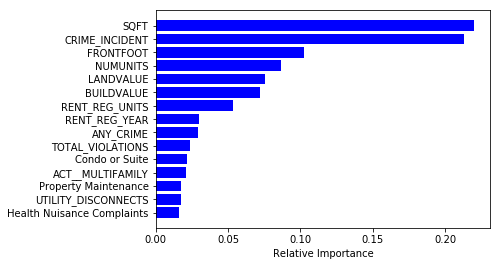

In [28]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)
ax = plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('Results - Feature importance.pdf', bbox_inches = 'tight', pad_inches = 0.5)

In [36]:
df[df['PREDICTION'] > 0].describe()

,SQFT,ACREAGE,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,ACT__14,ACT__AIRPORT,ACT__COMMERCIAL,...,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,LANDVALUE,BUILDVALUE,TOTALVALUE,INCIDENT,INCIDENT_2018,PREDICTION,RANDOM
count,5.524800e+04,55248.000000,55248.000000,55248.000000,55248.000000,55248.000000,55248.000000,55248.000000,55248.0,55248.000000,...,55248.000000,55248.000000,55248.000000,5.524800e+04,5.524800e+04,5.524800e+04,55248.000000,55248.000000,55248.000000,55248.000000
mean,1.899897e+04,0.436474,80.193918,3124.236805,153.000398,1.433735,57105.669164,0.000091,0.0,0.027241,...,0.058319,0.354999,0.187120,3.968061e+04,1.800338e+05,2.197203e+05,0.018589,0.001701,0.017997,0.498201
std,1.180242e+05,2.710588,85.653231,2289.548490,150.834342,6.667363,2.337154,0.009513,0.0,0.162786,...,0.296232,1.039941,0.390011,1.472408e+05,1.370903e+06,1.466557e+06,0.135069,0.041214,0.026694,0.289058
min,0.000000e+00,0.000000,0.000000,0.000000,110.000000,0.000000,57103.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.004962,0.000072
25%,6.600000e+03,0.150000,50.000000,1117.000000,110.000000,1.000000,57104.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.016500e+04,2.702275e+04,5.727450e+04,0.000000,0.000000,0.012637,0.246962
50%,8.758000e+03,0.200000,70.000000,2620.000000,110.000000,1.000000,57106.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,2.506000e+04,1.057660e+05,1.313205e+05,0.000000,0.000000,0.012637,0.498996
75%,1.188000e+04,0.270000,89.000000,4805.000000,110.000000,1.000000,57107.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,3.487200e+04,1.517080e+05,1.859840e+05,0.000000,0.000000,0.014120,0.748881
max,1.017474e+07,233.580000,5617.000000,47184.000000,990.000000,364.000000,57197.000000,1.000000,0.0,1.000000,...,9.000000,19.000000,1.000000,9.028652e+06,1.324379e+08,1.414665e+08,1.000000,1.000000,0.610877,0.999978


In [37]:
df[df['PREDICTION'] == 0].describe()

,SQFT,ACREAGE,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,ACT__14,ACT__AIRPORT,ACT__COMMERCIAL,...,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,LANDVALUE,BUILDVALUE,TOTALVALUE,INCIDENT,INCIDENT_2018,PREDICTION,RANDOM
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df[['PREDICTION','INCIDENT', 'INCIDENT_2018', 'SQFT', 'FRONTFOOT', 'NUMUNITS', 'Condo or Suite', 'Health Nuisance Complaints',
       'ACT__MULTIFAMILY', 'Property Maintenance', 'RENT_REG_UNITS', 'RENT_REG_YEAR',
       'LANDVALUE', 'BUILDVALUE', 'CRIME_INCIDENT', 'ANY_CRIME', 'UTILITY_DISCONNECTS', 'TOTAL_VIOLATIONS']].to_csv('Results - risk predictions.csv', header = True)

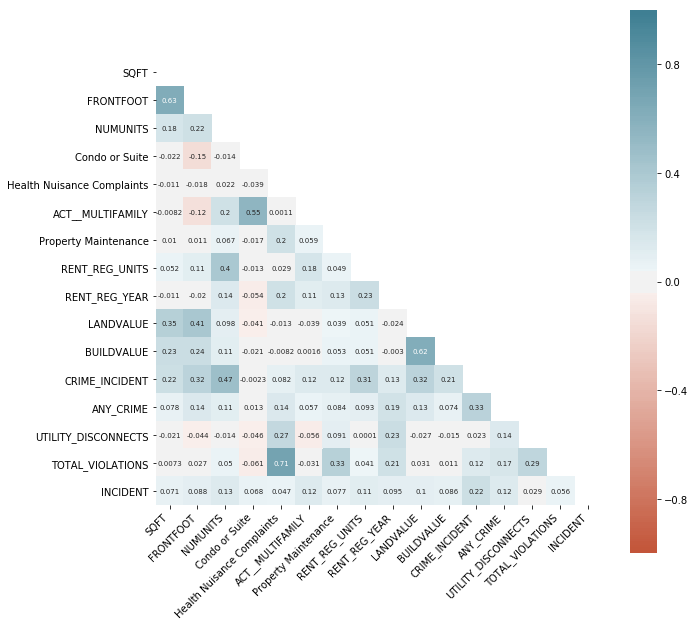

In [34]:
comb = pd.concat([X, y], axis = 1)
corr = comb.corr()

plt.figure(figsize = (10,10))

dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True


ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True, annot_kws={"size": 7},
    mask=dropSelf
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.savefig('Results - Correlation matrix.pdf', bbox_inches = 'tight', pad_inches = 2.5)

In [39]:
df.columns

Index(['SQFT', 'FRONTFOOT', 'PARHOUSE', 'LANDUSE', 'NUMUNITS', 'ZIPCODE',
       'ACT__14', 'ACT__AIRPORT', 'ACT__COMMERCIAL', 'ACT__INDUSTRIAL',
       'ACT__INSTITUTIONAL', 'ACT__MULTIFAMILY',
       'ACT__OFFICE AND PUBLIC SERVICE', 'ACT__OPEN SPACES/NA',
       'ACT__SINGLE OR TWO RESIDENTIAL', 'E', 'N', 'S', 'W', 'Condo or Suite',
       'Standard Tax Parcel', 'AVE', 'BLVD', 'CIR', 'CT', 'DR', 'HTS', 'LN',
       'MNR', 'PASS', 'PKWY', 'PL', 'RD', 'RDG', 'ST', 'TER', 'TRL', 'WAY',
       'LINCOLN', 'MINNEHAHA', 'date', 'FORECLOSED', 'RENT_REG_UNITS',
       'RENT_REG_YEAR', 'RENT_REG', 'UTILITY_DISCONNECTS', 'ANY_DISCONNECT',
       'Building Service', 'Drainage', 'Erosion and Sediment Control', 'Fire',
       'Health Nuisance Complaints', 'IMPORT / Tree Survey & Stump Removal',
       'Illicit Discharge', 'Landfill', 'Manufactured Housing',
       'Parks and Rec - Dead or Diseased Tree',
       'Parks and Rec - Tree Complaint', 'Property Maintenance',
       'Rental Registration'

In [40]:
df.ACT__COMMERCIAL.value_counts()

0    53743
1     1505
Name: ACT__COMMERCIAL, dtype: int64

In [50]:
df_commercial.describe()

,SQFT,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,ACT__14,ACT__AIRPORT,ACT__COMMERCIAL,ACT__INDUSTRIAL,...,ANY_VIOLATIONS,CRIME_INCIDENT,ANY_CRIME,LANDVALUE,BUILDVALUE,TOTALVALUE,INCIDENT,INCIDENT_2018,PREDICTION,RANDOM
count,1.505000e+03,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.0,1505.0,1505.0,1505.0,...,1505.000000,1505.000000,1505.000000,1.505000e+03,1.505000e+03,1.505000e+03,1505.000000,1505.000000,1505.000000,1505.000000
mean,6.905422e+04,170.827103,2338.931561,660.052492,0.142193,57104.887043,0.0,0.0,1.0,0.0,...,0.358140,7.427907,0.738206,2.938123e+05,8.743117e+05,1.168319e+06,0.061130,0.007309,0.054894,0.500686
std,1.490534e+05,155.975041,1701.168992,155.007032,1.680530,1.590948,0.0,0.0,0.0,0.0,...,0.479613,13.776677,0.439757,6.603473e+05,6.056784e+06,6.539794e+06,0.239647,0.085208,0.089407,0.286971
min,0.000000e+00,0.000000,0.000000,110.000000,0.000000,57103.000000,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.001975,0.001113
25%,1.243200e+04,72.000000,836.000000,580.000000,0.000000,57104.000000,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,2.970000e+04,3.062100e+04,8.428500e+04,0.000000,0.000000,0.018491,0.256917
50%,2.983200e+04,132.000000,2100.000000,621.000000,0.000000,57104.000000,0.0,0.0,1.0,0.0,...,0.000000,3.000000,1.000000,1.122000e+05,1.928710e+05,3.292930e+05,0.000000,0.000000,0.035030,0.496693
75%,6.506400e+04,222.000000,3601.000000,791.000000,0.000000,57106.000000,0.0,0.0,1.0,0.0,...,1.000000,9.000000,1.000000,2.891570e+05,5.733560e+05,8.861770e+05,0.000000,0.000000,0.059969,0.748373
max,2.257163e+06,1338.000000,8501.000000,970.000000,40.000000,57110.000000,0.0,0.0,1.0,0.0,...,1.000000,171.000000,1.000000,9.028652e+06,1.324379e+08,1.414665e+08,1.000000,1.000000,0.978608,0.999978
